In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
df_feature = pd.read_csv('Amazon_mobile_features.csv')

In [2]:
df_feature.head()

,review_body,star_rating,vine,verified_purchase,helpfulness,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,...,flesch_reading_ease,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count
0,advertised everything works perfectly im happy...,5.0,0,1,0,1.000000,0.800000,1.00,0.8,2,...,39.33,11.5,11.2,13.04,11.5,9.64,6,4,1,1
1,great,5.0,0,1,0,0.750000,0.800000,0.00,0.0,2,...,121.22,-3.5,2.6,-16.41,-0.5,0.05,0,0,0,1
2,work great fit life proof case iphone,5.0,0,1,0,0.575000,0.600000,0.75,0.8,2,...,115.13,-1.2,2.9,5.75,2.5,8.50,5,0,0,2
3,work well couldnt get used hearing anything ea...,4.0,0,1,0,0.000000,0.000000,0.00,0.0,1,...,87.72,3.3,7.7,11.22,3.5,7.59,3,3,1,2
4,careful products bought several cameras image ...,2.0,0,1,0,0.666667,0.079167,0.00,0.0,2,...,42.38,10.3,14.0,18.08,6.0,12.13,6,2,1,3


In [3]:
# Here we are moving helpfulness to last column

mid = df_feature['helpfulness']
df_feature.drop(labels=['helpfulness'], axis=1, inplace = True)
df_feature.insert(25, 'helpfulness', mid)
df_feature.head()

,review_body,star_rating,vine,verified_purchase,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment,...,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count,helpfulness
0,advertised everything works perfectly im happy...,5.0,0,1,1.000000,0.800000,1.00,0.8,2,2,...,11.5,11.2,13.04,11.5,9.64,6,4,1,1,0
1,great,5.0,0,1,0.750000,0.800000,0.00,0.0,2,1,...,-3.5,2.6,-16.41,-0.5,0.05,0,0,0,1,0
2,work great fit life proof case iphone,5.0,0,1,0.575000,0.600000,0.75,0.8,2,2,...,-1.2,2.9,5.75,2.5,8.50,5,0,0,2,0
3,work well couldnt get used hearing anything ea...,4.0,0,1,0.000000,0.000000,0.00,0.0,1,1,...,3.3,7.7,11.22,3.5,7.59,3,3,1,2,0
4,careful products bought several cameras image ...,2.0,0,1,0.666667,0.079167,0.00,0.0,2,1,...,10.3,14.0,18.08,6.0,12.13,6,2,1,3,0


In [4]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104847 entries, 0 to 104846
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_body                   104729 non-null  object 
 1   star_rating                   104847 non-null  float64
 2   vine                          104847 non-null  int64  
 3   verified_purchase             104847 non-null  int64  
 4   subjectivity                  104847 non-null  float64
 5   polarity                      104847 non-null  float64
 6   s_subjectivity                104847 non-null  float64
 7   s_polarity                    104847 non-null  float64
 8   sentiment                     104847 non-null  int64  
 9   s_sentiment                   104847 non-null  int64  
 10  character_count               104847 non-null  int64  
 11  word_count                    104847 non-null  int64  
 12  s_word_count                  104847 non-nul

In [5]:

df_feature.to_csv('Amazon_mobile_clean.csv',index=False)

In [24]:
df_feature.head()

,review_body,star_rating,vine,verified_purchase,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment,...,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count,helpfulness
0,advertised everything works perfectly im happy...,5.0,0,1,1.000000,0.800000,1.00,0.8,2,2,...,11.5,11.2,13.04,11.5,9.64,6,4,1,1,0
1,great,5.0,0,1,0.750000,0.800000,0.00,0.0,2,1,...,-3.5,2.6,-16.41,-0.5,0.05,0,0,0,1,0
2,work great fit life proof case iphone,5.0,0,1,0.575000,0.600000,0.75,0.8,2,2,...,-1.2,2.9,5.75,2.5,8.50,5,0,0,2,0
3,work well couldnt get used hearing anything ea...,4.0,0,1,0.000000,0.000000,0.00,0.0,1,1,...,3.3,7.7,11.22,3.5,7.59,3,3,1,2,0
4,careful products bought several cameras image ...,2.0,0,1,0.666667,0.079167,0.00,0.0,2,1,...,10.3,14.0,18.08,6.0,12.13,6,2,1,3,0


In [25]:
X = df_feature.iloc[:,1:25]  #independent columns
y = df_feature.iloc[:,-1]    #target column i.e helpfulness

In [26]:
#apply SelectKBest class to extract best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func= f_classif, k=10)
fit = bestfeatures.fit(X,y)

In [27]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [28]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [29]:
featureScores

,Specs,Score
0,star_rating,3.157433
1,vine,1.682656
2,verified_purchase,1433.696473
3,subjectivity,4.236147
4,polarity,474.777182
5,s_subjectivity,450.257092
6,s_polarity,140.577796
7,sentiment,104.959858
8,s_sentiment,176.281524
9,character_count,6599.067589


In [30]:
print(featureScores.nlargest(10,'Score'))  #print 10 largest features

                          Specs         Score
18        linsear_write_formula  10091.627104
12            unique_word_count   8407.754721
15         flesch_kincaid_grade   6816.362496
16  automated_readability_index   6749.249426
10                   word_count   6656.807168
9               character_count   6599.067589
23                    adj_count   6597.478853
13               syllable_count   6549.787545
20                   noun_count   6484.374963
21                   verb_count   6235.530824


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [32]:
print(model.feature_importances_)

[3.17023758e-02 9.99759738e-05 1.08559486e-02 5.26325970e-02
 5.21399960e-02 3.53937203e-02 3.41573613e-02 1.09882099e-02
 1.39163861e-02 5.45537073e-02 4.80241161e-02 4.42351606e-02
 5.12707386e-02 5.13939846e-02 4.49612296e-02 4.53942248e-02
 5.39728358e-02 4.96687068e-02 6.28984459e-02 5.31588286e-02
 5.33018589e-02 4.97828125e-02 4.52079711e-02 5.02888078e-02]


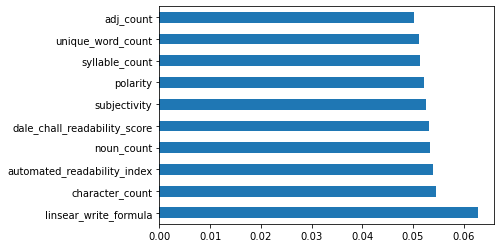

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

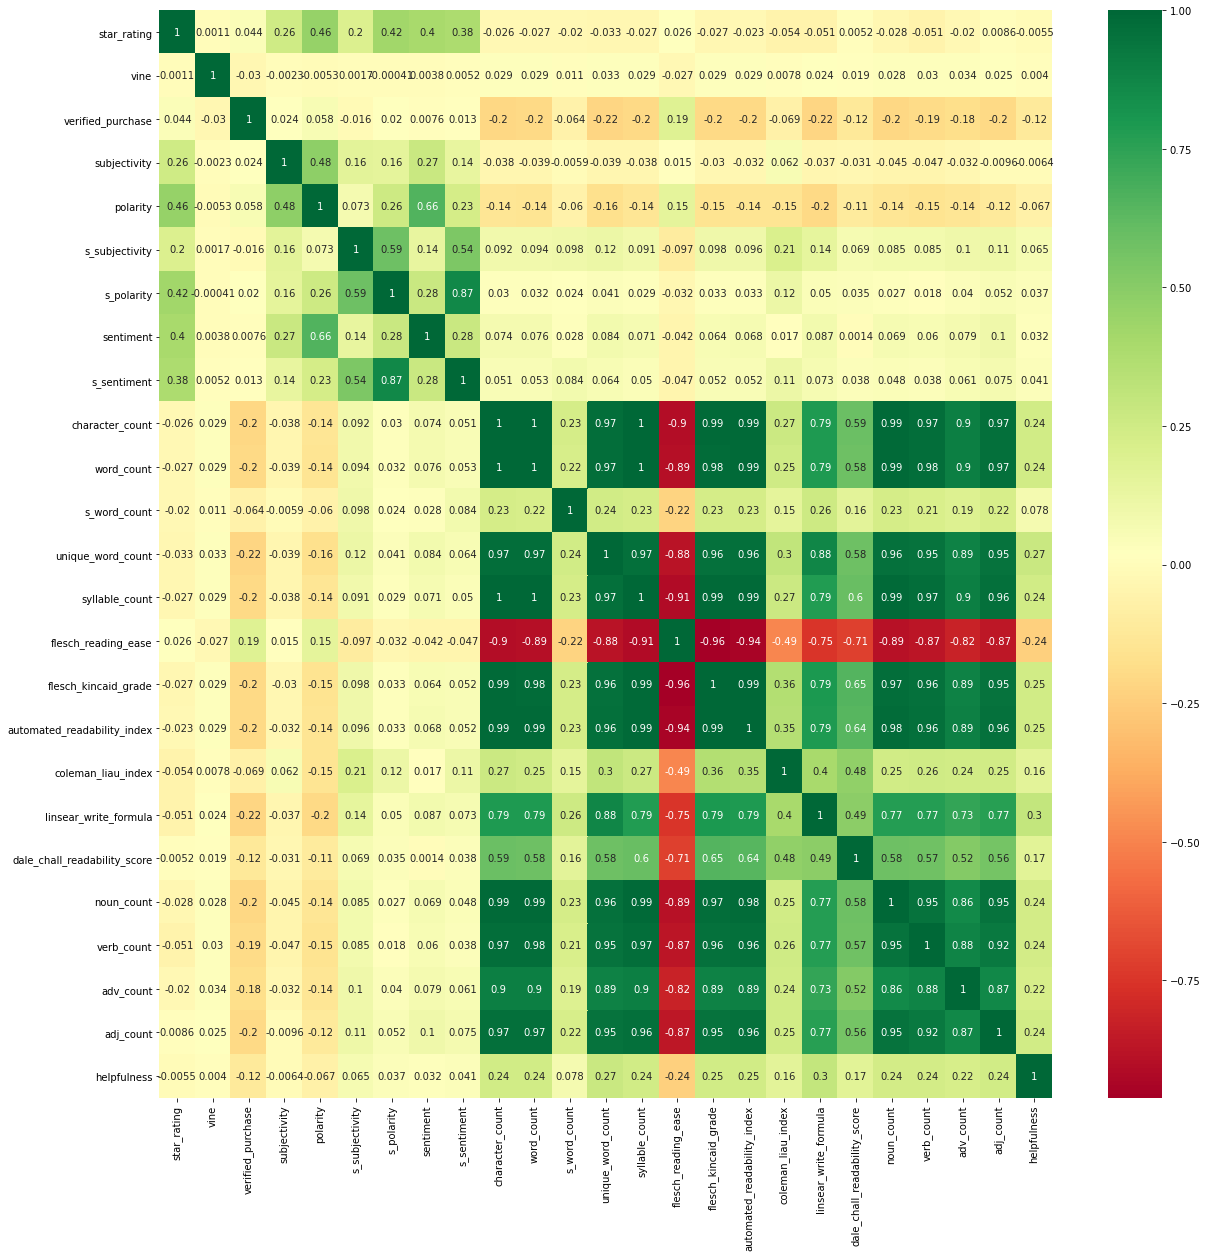

In [34]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_feature.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_feature[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [35]:
corr = df_feature.corr().abs()
corr 

,star_rating,vine,verified_purchase,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment,character_count,...,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count,helpfulness
star_rating,1.000000,0.001081,0.044331,0.255731,0.460463,0.195999,0.418989,0.396448,0.384884,0.026328,...,0.027125,0.022703,0.053658,0.051500,0.005158,0.027808,0.050679,0.019899,0.008562,0.005488
vine,0.001081,1.000000,0.030371,0.002304,0.005294,0.001669,0.000410,0.003787,0.005239,0.029050,...,0.028924,0.029192,0.007784,0.024154,0.018609,0.027636,0.030288,0.034278,0.025404,0.004006
verified_purchase,0.044331,0.030371,1.000000,0.023683,0.057609,0.015578,0.019728,0.007593,0.012997,0.203159,...,0.201391,0.201692,0.069080,0.218116,0.122710,0.203318,0.193887,0.179864,0.196153,0.116146
subjectivity,0.255731,0.002304,0.023683,1.000000,0.479448,0.161150,0.155087,0.274909,0.139898,0.037587,...,0.030196,0.031522,0.061663,0.037000,0.030722,0.044760,0.046657,0.032120,0.009572,0.006356
polarity,0.460463,0.005294,0.057609,0.479448,1.000000,0.072936,0.260099,0.659664,0.227708,0.140471,...,0.150234,0.142635,0.146743,0.198020,0.106252,0.138131,0.152674,0.138341,0.115831,0.067141
s_subjectivity,0.195999,0.001669,0.015578,0.161150,0.072936,1.000000,0.585815,0.138234,0.537814,0.092067,...,0.097887,0.095952,0.207835,0.143243,0.069238,0.085132,0.084934,0.102556,0.110448,0.065392
s_polarity,0.418989,0.000410,0.019728,0.155087,0.260099,0.585815,1.000000,0.275748,0.868049,0.030496,...,0.032771,0.033369,0.116288,0.049558,0.035218,0.027208,0.018223,0.039913,0.052151,0.036593
sentiment,0.396448,0.003787,0.007593,0.274909,0.659664,0.138234,0.275748,1.000000,0.278796,0.073734,...,0.064335,0.068286,0.016917,0.086526,0.001432,0.068681,0.059953,0.079095,0.102985,0.031624
s_sentiment,0.384884,0.005239,0.012997,0.139898,0.227708,0.537814,0.868049,0.278796,1.000000,0.051359,...,0.052167,0.052455,0.111565,0.072635,0.038469,0.047672,0.038349,0.061300,0.074972,0.040970
character_count,0.026328,0.029050,0.203159,0.037587,0.140471,0.092067,0.030496,0.073734,0.051359,1.000000,...,0.985485,0.990794,0.268828,0.786434,0.593398,0.987912,0.973342,0.901449,0.966972,0.243340


In [36]:
corr = df_feature.corr().round(3)
corr

,star_rating,vine,verified_purchase,subjectivity,polarity,s_subjectivity,s_polarity,sentiment,s_sentiment,character_count,...,flesch_kincaid_grade,automated_readability_index,coleman_liau_index,linsear_write_formula,dale_chall_readability_score,noun_count,verb_count,adv_count,adj_count,helpfulness
star_rating,1.000,0.001,0.044,0.256,0.460,0.196,0.419,0.396,0.385,-0.026,...,-0.027,-0.023,-0.054,-0.051,0.005,-0.028,-0.051,-0.020,0.009,-0.005
vine,0.001,1.000,-0.030,-0.002,-0.005,0.002,-0.000,0.004,0.005,0.029,...,0.029,0.029,0.008,0.024,0.019,0.028,0.030,0.034,0.025,0.004
verified_purchase,0.044,-0.030,1.000,0.024,0.058,-0.016,0.020,0.008,0.013,-0.203,...,-0.201,-0.202,-0.069,-0.218,-0.123,-0.203,-0.194,-0.180,-0.196,-0.116
subjectivity,0.256,-0.002,0.024,1.000,0.479,0.161,0.155,0.275,0.140,-0.038,...,-0.030,-0.032,0.062,-0.037,-0.031,-0.045,-0.047,-0.032,-0.010,-0.006
polarity,0.460,-0.005,0.058,0.479,1.000,0.073,0.260,0.660,0.228,-0.140,...,-0.150,-0.143,-0.147,-0.198,-0.106,-0.138,-0.153,-0.138,-0.116,-0.067
s_subjectivity,0.196,0.002,-0.016,0.161,0.073,1.000,0.586,0.138,0.538,0.092,...,0.098,0.096,0.208,0.143,0.069,0.085,0.085,0.103,0.110,0.065
s_polarity,0.419,-0.000,0.020,0.155,0.260,0.586,1.000,0.276,0.868,0.030,...,0.033,0.033,0.116,0.050,0.035,0.027,0.018,0.040,0.052,0.037
sentiment,0.396,0.004,0.008,0.275,0.660,0.138,0.276,1.000,0.279,0.074,...,0.064,0.068,0.017,0.087,0.001,0.069,0.060,0.079,0.103,0.032
s_sentiment,0.385,0.005,0.013,0.140,0.228,0.538,0.868,0.279,1.000,0.051,...,0.052,0.052,0.112,0.073,0.038,0.048,0.038,0.061,0.075,0.041
character_count,-0.026,0.029,-0.203,-0.038,-0.140,0.092,0.030,0.074,0.051,1.000,...,0.985,0.991,0.269,0.786,0.593,0.988,0.973,0.901,0.967,0.243
